## Cen√°rio

No momento da adesao de um seguro, tenho cerca de 20 vari√°veis (categoricas e numericas) para mapear o perfil dos clientes na entrada por per√≠odo.

## ETL

In [1]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression



In [2]:
# Volumetria por m√™s
meses = ['202401', '202402', '202403', '202404', '202405', '202406', '202407', 
         '202408', '202409', '202410', '202411', '202412']
volumes = [31910, 33472, 31777, 19771, 24249, 26134, 18438, 32058, 29322, 28121, 21647, 29358]

# Estados do Brasil
estados = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 
           'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 
           'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

# Inicializar lista para dados
dados = []
id_adesao = 1

for mes, n in zip(meses, volumes):
    for _ in range(n):
        canal = np.random.choice(['LOJA', 'INTERNET'])
        codigo_loja = np.random.choice(['L1', 'L2', 'L3', 'L4', 'L5']) if canal == 'LOJA' else np.nan
        tipo_venda = np.random.choice(['POS', 'PRE'])
        produto = np.random.choice(['PERDA', 'LAR', 'SAUDE', 'FATURA'])
        prestamista = 1 if produto == 'FATURA' else 0
        valor = 0 if prestamista == 1 else {'PERDA': 5, 'LAR': 10, 'SAUDE': 20}[produto]
        estado = np.random.choice(estados)
        
        linha = {
            'ID_ADESAO': id_adesao,
            'SAFRA_ADESAO': mes,
            'CANAL_VENDA': canal,
            'CODIGO_LOJA': codigo_loja,
            'TIPO_VENDA': tipo_venda,
            'PRODUTO': produto,
            'PRESTAMISTA': prestamista,
            'ESTADO': estado,
            'VALOR': valor
        }
        dados.append(linha)
        id_adesao += 1

# Criar DataFrame final
df = pd.DataFrame(dados)
df.head()

ID_ADESAO SAFRA_ADESAO CANAL_VENDA CODIGO_LOJA TIPO_VENDA PRODUTO  \
0          1       202401        LOJA          L2        POS  FATURA   
1          2       202401        LOJA          L5        PRE  FATURA   
2          3       202401    INTERNET         NaN        PRE  FATURA   
3          4       202401        LOJA          L1        PRE  FATURA   
4          5       202401    INTERNET         NaN        PRE   PERDA   

   PRESTAMISTA ESTADO  VALOR  
0            1     CE      0  
1            1     AC      0  
2            1     RS      0  
3            1     DF      0  
4            0     PA      5

## Analises Iniciais

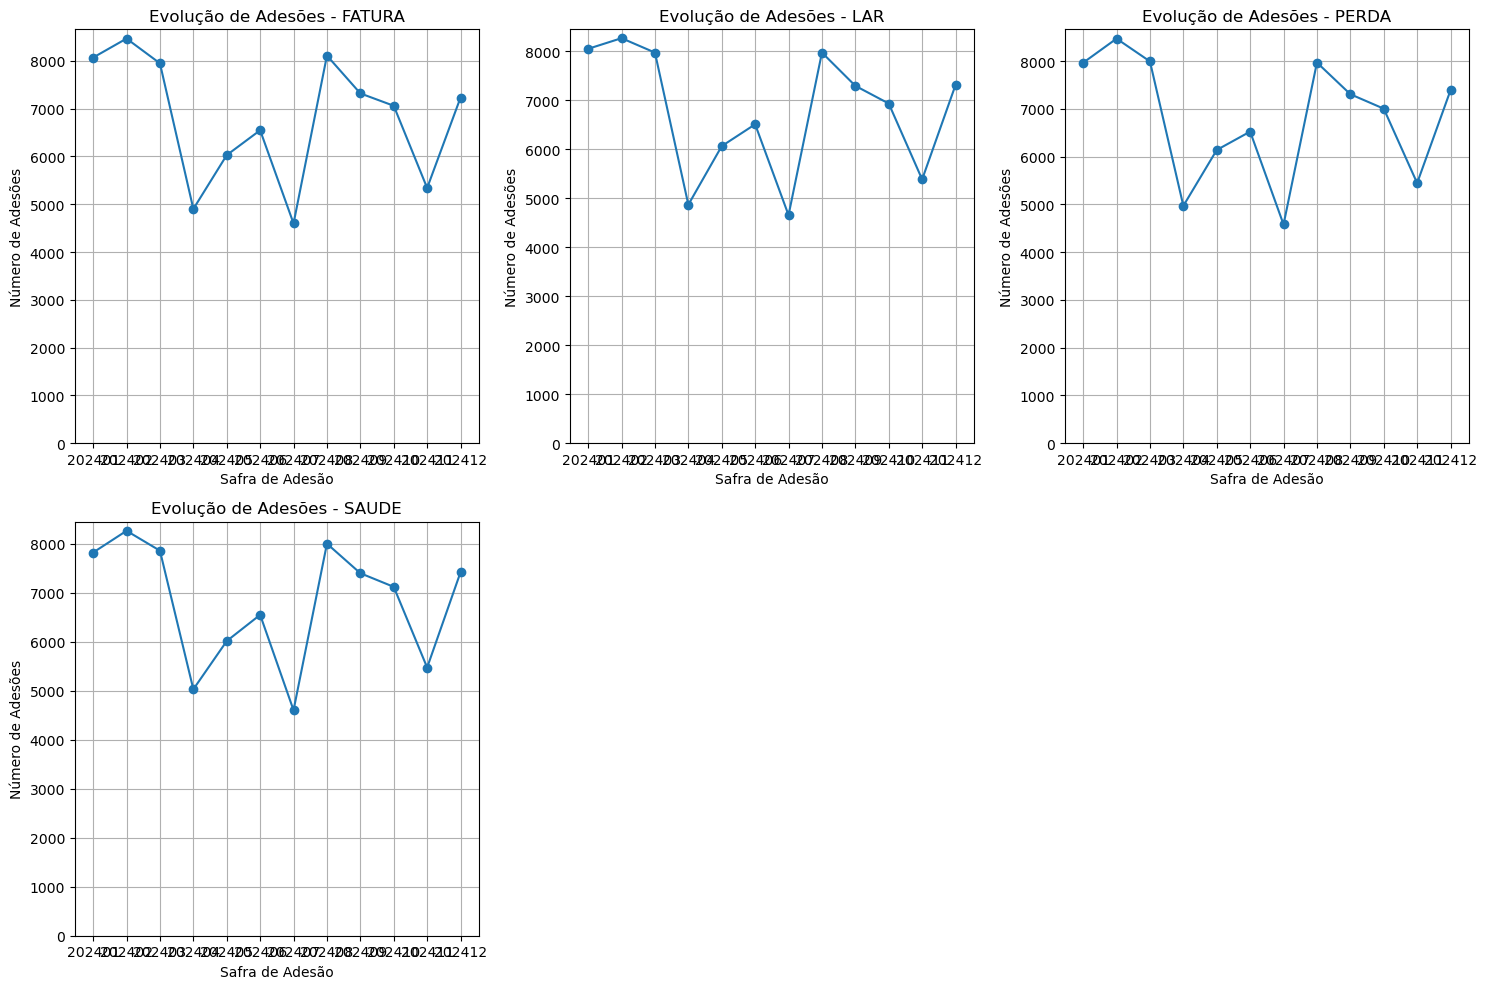

In [4]:
# Contagem de ades√µes por safra e produto
contagem_produto = df.groupby(['SAFRA_ADESAO', 'PRODUTO'])['ID_ADESAO'].count().unstack('PRODUTO').fillna(0)

# Configurar matriz de subplots: 3 colunas, n linhas
n_produtos = contagem_produto.shape[1]
n_cols = 3
n_rows = math.ceil(n_produtos / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten()  # transformar em lista simples para itera√ß√£o

# Plotar cada produto
for i, produto in enumerate(contagem_produto.columns):
    axs[i].plot(contagem_produto.index, contagem_produto[produto], marker='o')
    axs[i].set_title(f'Evolu√ß√£o de Ades√µes - {produto}')
    axs[i].set_xlabel('Safra de Ades√£o')
    axs[i].set_ylabel('N√∫mero de Ades√µes')
    axs[i].set_ylim(bottom=0)  # garantir Y come√ßando em 0
    axs[i].grid(True)

# Apagar gr√°ficos extras se sobrarem espa√ßos vazios
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()



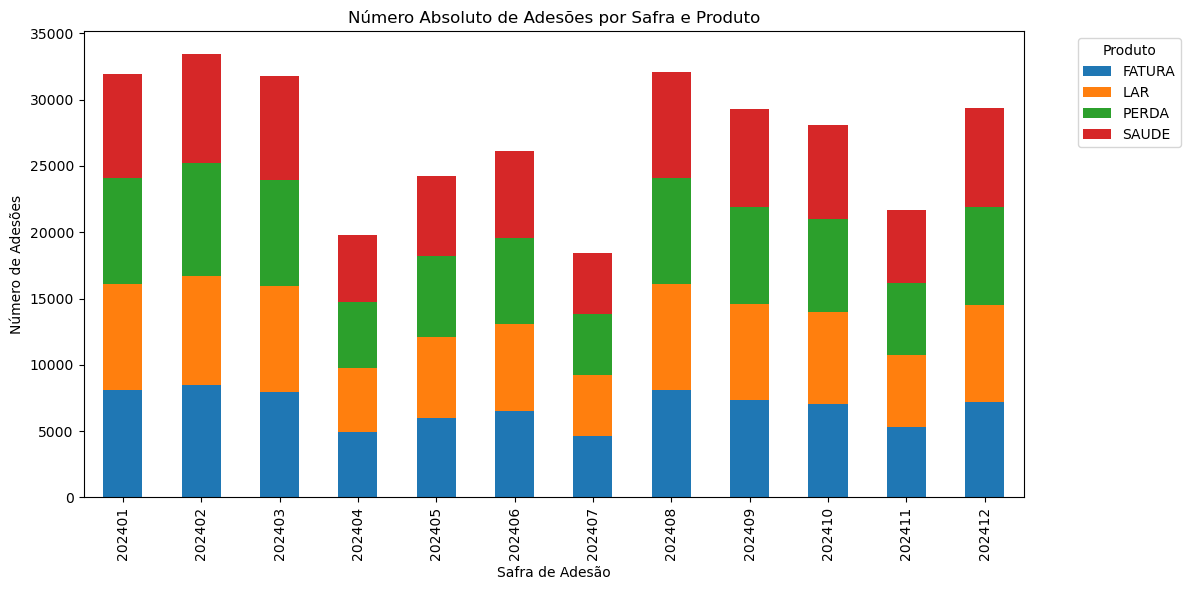

In [7]:
# Contagem de ades√µes por safra e produto
contagem_produto = df.groupby(['SAFRA_ADESAO', 'PRODUTO'])['ID_ADESAO'].count().unstack('PRODUTO').fillna(0)

# Plotar gr√°fico de barras empilhadas absolutas
contagem_produto.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('N√∫mero Absoluto de Ades√µes por Safra e Produto')
plt.xlabel('Safra de Ades√£o')
plt.ylabel('N√∫mero de Ades√µes')
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


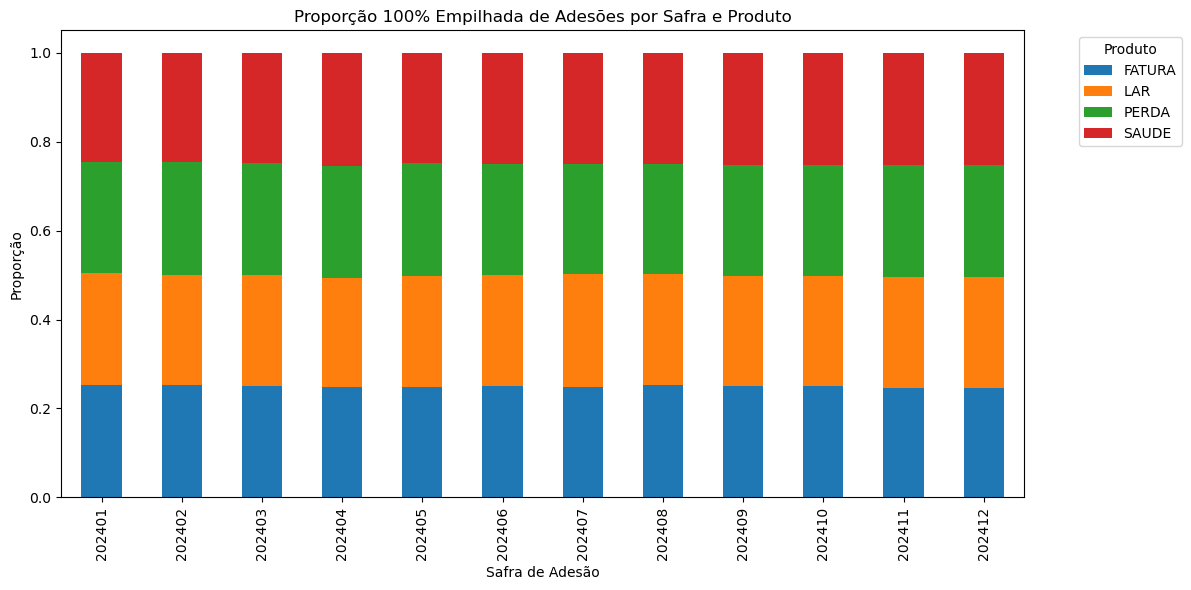

In [6]:
import matplotlib.pyplot as plt

# Contagem de ades√µes por safra e produto
contagem_produto = df.groupby(['SAFRA_ADESAO', 'PRODUTO'])['ID_ADESAO'].count().unstack('PRODUTO').fillna(0)

# Calcular propor√ß√£o 100%
proporcao_produto = contagem_produto.div(contagem_produto.sum(axis=1), axis=0)

# Plotar gr√°fico de barras 100% empilhadas
proporcao_produto.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Propor√ß√£o 100% Empilhada de Ades√µes por Safra e Produto')
plt.xlabel('Safra de Ades√£o')
plt.ylabel('Propor√ß√£o')
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Abertura por vari√°veis

In [8]:
# Resumo geral do DataFrame
print("üìä Resumo geral do DataFrame:\n")
print(df.info())

print("\n‚úÖ Descri√ß√£o num√©rica:\n")
print(df.describe())

print("\n‚úÖ Descri√ß√£o categ√≥rica (valores √∫nicos, mais frequentes):\n")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nüîπ Vari√°vel: {col}")
    print(f"- Valores √∫nicos: {df[col].nunique()}")
    print(f"- Mais frequente:\n{df[col].value_counts().head()}")


üìä Resumo geral do DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326257 entries, 0 to 326256
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID_ADESAO     326257 non-null  int64 
 1   SAFRA_ADESAO  326257 non-null  object
 2   CANAL_VENDA   326257 non-null  object
 3   CODIGO_LOJA   163348 non-null  object
 4   TIPO_VENDA    326257 non-null  object
 5   PRODUTO       326257 non-null  object
 6   PRESTAMISTA   326257 non-null  int64 
 7   ESTADO        326257 non-null  object
 8   VALOR         326257 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 22.4+ MB
None

‚úÖ Descri√ß√£o num√©rica:

           ID_ADESAO    PRESTAMISTA          VALOR
count  326257.000000  326257.000000  326257.000000
mean   163129.000000       0.250168       8.744824
std     94182.427725       0.433110       7.396419
min         1.000000       0.000000       0.000000
25%     81565.000000       0.000000       0.

## Abertura por vari√°veis

In [13]:
# Identificar vari√°veis categ√≥ricas e num√©ricas
variaveis_categ = df.select_dtypes(include=['object', 'category']).columns.tolist()
variaveis_num = df.select_dtypes(include=['number']).columns.tolist()

# Remover SAFRA_ADESAO (se existir nas listas)
if 'SAFRA_ADESAO' in variaveis_categ:
    variaveis_categ.remove('SAFRA_ADESAO')

if 'SAFRA_ADESAO' in variaveis_num:
    variaveis_num.remove('SAFRA_ADESAO')

print("‚úÖ Vari√°veis categ√≥ricas:")
print(variaveis_categ)

print("\n‚úÖ Vari√°veis num√©ricas:")
print(variaveis_num)



‚úÖ Vari√°veis categ√≥ricas:
['CANAL_VENDA', 'CODIGO_LOJA', 'TIPO_VENDA', 'PRODUTO', 'ESTADO']

‚úÖ Vari√°veis num√©ricas:
['ID_ADESAO', 'PRESTAMISTA', 'VALOR']


In [17]:
# Inicializar dicion√°rio
variacao_categ = {}

# Calcular varia√ß√£o m√™s a m√™s para cada vari√°vel categ√≥rica limpa
for var in variaveis_categ:
    distrib = df.groupby(['SAFRA_ADESAO', var]).size().groupby(level=0).apply(lambda x: x / x.sum())
    pivot = distrib.unstack().fillna(0)  # garantir valores sem NaN
    delta = pivot.diff().abs().sum().sum()
    variacao_categ[var] = delta

# Mostrar resultado final
print("üìä Varia√ß√£o total por vari√°vel categ√≥rica:")
for var, valor in variacao_categ.items():
    print(f"- {var}: {valor:.4f}")


üìä Varia√ß√£o total por vari√°vel categ√≥rica:
- CANAL_VENDA: 0.0796
- CODIGO_LOJA: 0.1857
- TIPO_VENDA: 0.0861
- PRODUTO: 0.0915
- ESTADO: 0.3807


In [19]:
# Transformar dicion√°rio em DataFrame para an√°lise
df_variacao = pd.DataFrame.from_dict(variacao_categ, orient='index', columns=['Variacao_Total'])
df_variacao = df_variacao.sort_values('Variacao_Total', ascending=False)

# Identificar vari√°vel com maior e menor varia√ß√£o
maior_var = df_variacao['Variacao_Total'].idxmax()
menor_var = df_variacao['Variacao_Total'].idxmin()

# Gerar resumo explicativo autom√°tico
print(f"üìà A vari√°vel categ√≥rica com MAIOR varia√ß√£o foi '{maior_var}', indicando mudan√ßas expressivas m√™s a m√™s na distribui√ß√£o das categorias.")
print(f"üìâ A vari√°vel com MENOR varia√ß√£o foi '{menor_var}', indicando estabilidade ao longo dos meses.")
print("Essas m√©tricas ajudam a √°rea de neg√≥cios a identificar onde houve mais movimenta√ß√£o nos perfis e priorizar an√°lises ou a√ß√µes espec√≠ficas.")

üìà A vari√°vel categ√≥rica com MAIOR varia√ß√£o foi 'ESTADO', indicando mudan√ßas expressivas m√™s a m√™s na distribui√ß√£o das categorias.
üìâ A vari√°vel com MENOR varia√ß√£o foi 'CANAL_VENDA', indicando estabilidade ao longo dos meses.
Essas m√©tricas ajudam a √°rea de neg√≥cios a identificar onde houve mais movimenta√ß√£o nos perfis e priorizar an√°lises ou a√ß√µes espec√≠ficas.


In [20]:
# Preparar dicion√°rio de DataFrames para armazenar diferen√ßas e percentuais
resultados_mensais = {}

for var in variaveis_categ:
    # Contagem absoluta de IDs por safra + categoria
    contagem = df.groupby(['SAFRA_ADESAO', var])['ID_ADESAO'].count().unstack(var).fillna(0)
    # Diferen√ßa absoluta m√™s a m√™s
    delta_abs = contagem.diff()
    # Percentual de varia√ß√£o m√™s a m√™s (evitar divis√£o por zero)
    delta_pct = delta_abs.divide(contagem.shift(1)).replace([np.inf, -np.inf], np.nan) * 100

    # Juntar em um √∫nico DataFrame
    df_resultado = pd.concat([delta_abs.add_suffix('_abs'), delta_pct.add_suffix('_pct')], axis=1)
    resultados_mensais[var] = df_resultado

    # Mostrar resumo no console
    print(f"\nüìä Diferen√ßa absoluta e percentual m√™s a m√™s para {var}:")
    print(df_resultado)




üìä Diferen√ßa absoluta e percentual m√™s a m√™s para CANAL_VENDA:
CANAL_VENDA   INTERNET_abs  LOJA_abs  INTERNET_pct   LOJA_pct
SAFRA_ADESAO                                                 
202401                 NaN       NaN           NaN        NaN
202402               588.0     974.0      3.670641   6.129256
202403              -749.0    -946.0     -4.510146  -5.609250
202404             -6021.0   -5985.0    -37.968218 -37.596583
202405              2222.0    2256.0     22.588187  22.709885
202406               782.0    1103.0      6.484783   9.048400
202407             -3574.0   -4122.0    -27.832723 -31.008802
202408              6792.0    6828.0     73.292328  74.452077
202409             -1325.0   -1411.0     -8.250825  -8.819301
202410              -664.0    -537.0     -4.506583  -3.681108
202411             -3282.0   -3192.0    -23.326226 -22.717244
202412              3982.0    3729.0     36.911383  34.340179

üìä Diferen√ßa absoluta e percentual m√™s a m√™s para CODIGO_

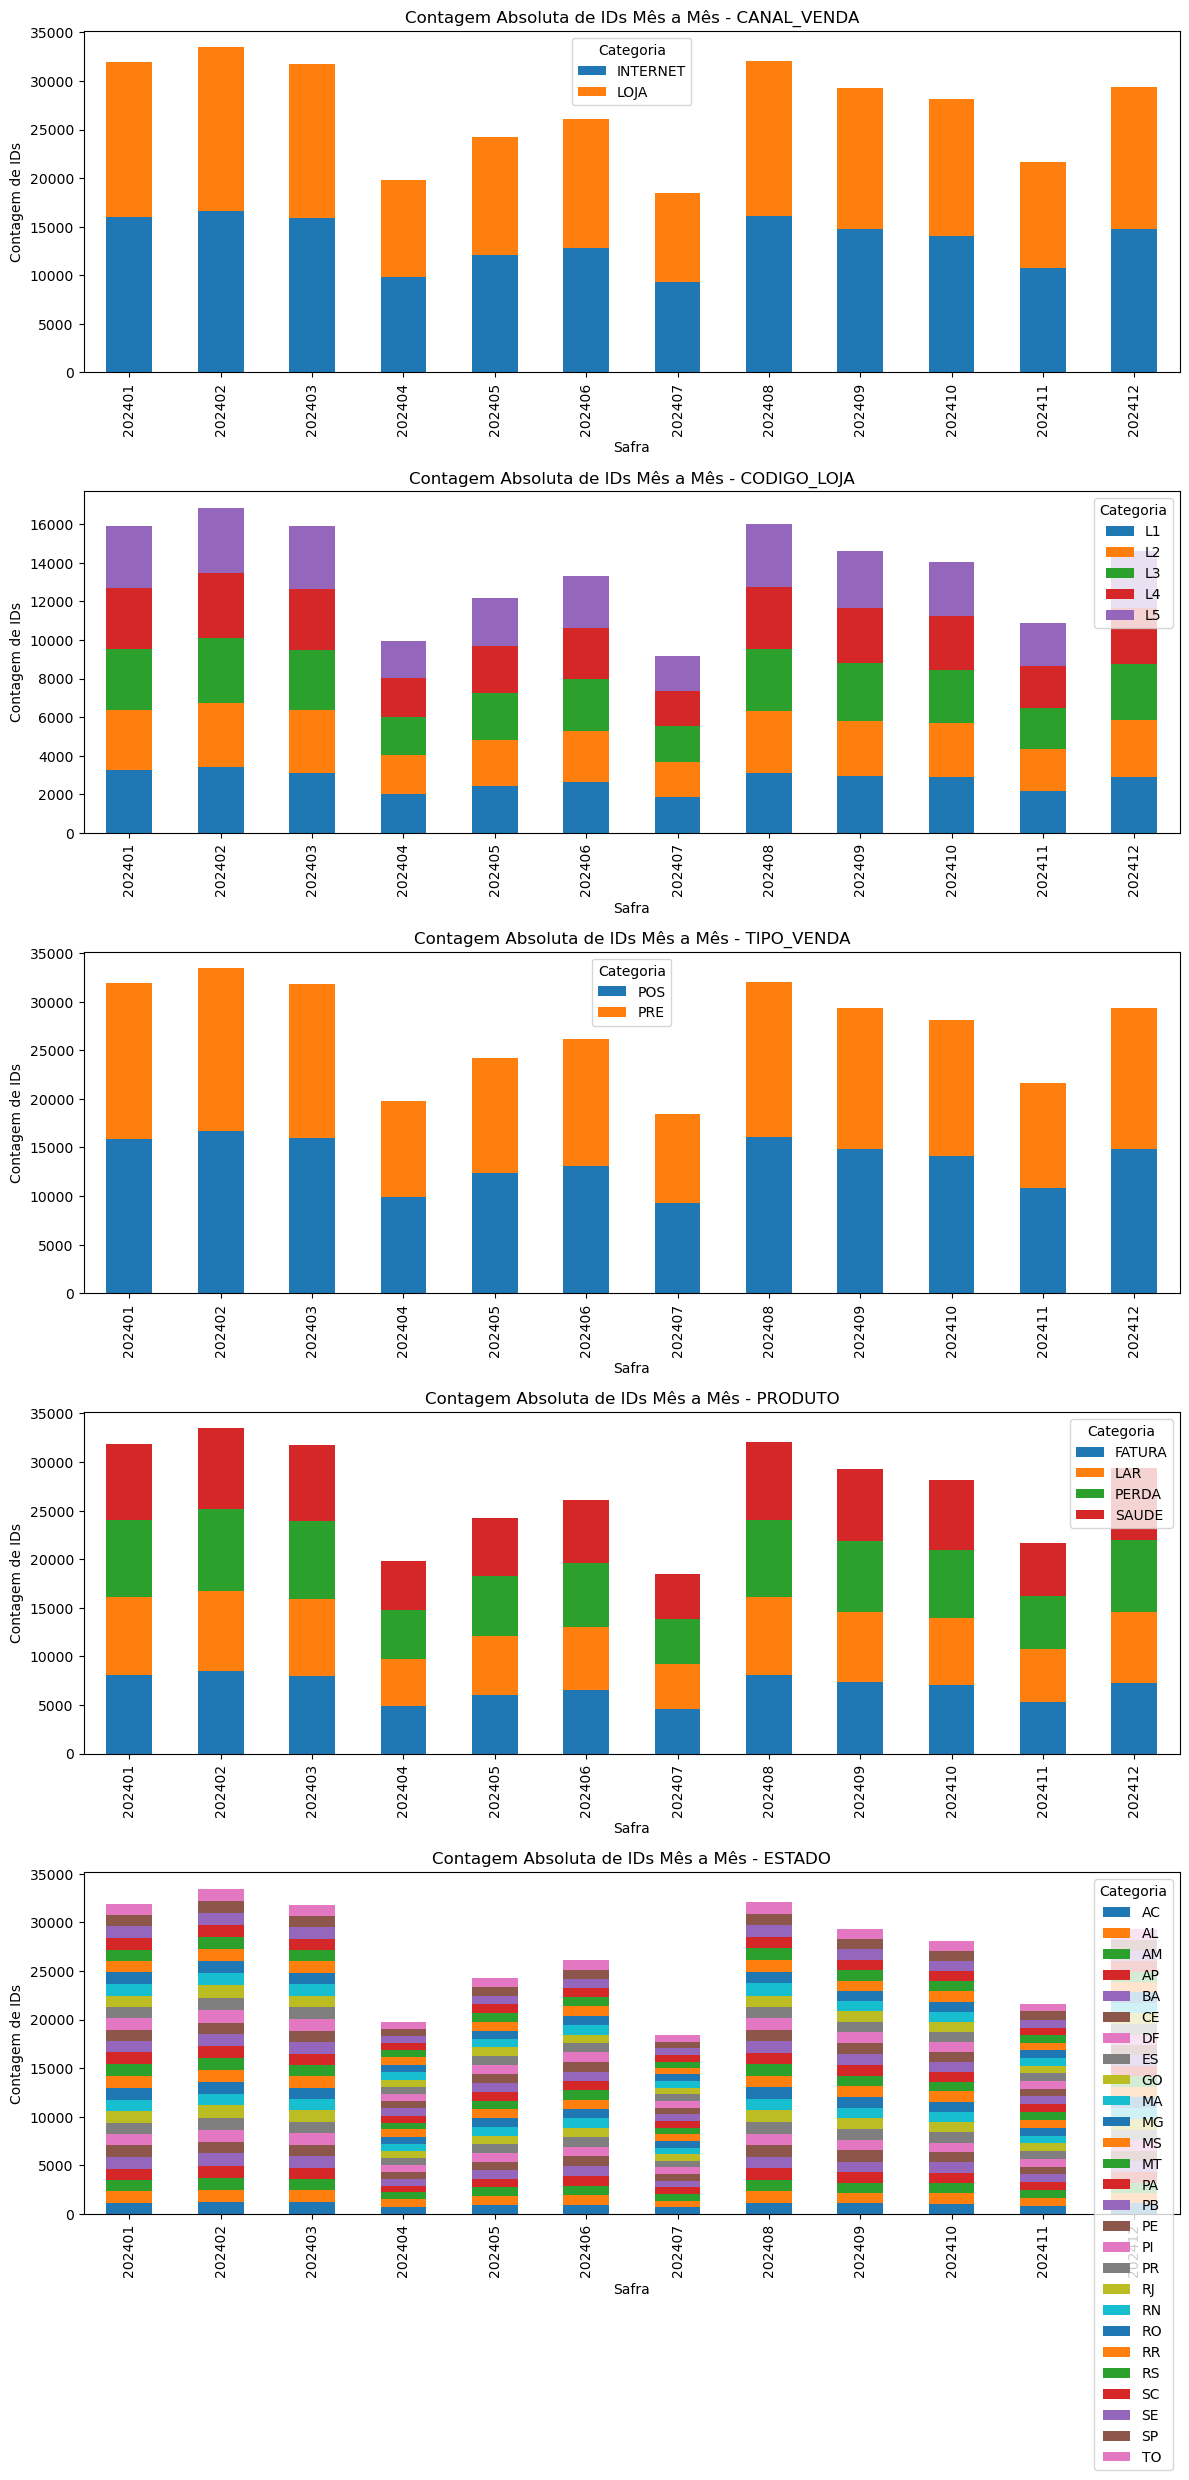

In [22]:
# Filtrar vari√°veis categ√≥ricas, exceto SAFRA_ADESAO
variaveis_categ_filtradas = [v for v in variaveis_categ if v != 'SAFRA_ADESAO']

# Preparar subplots para gr√°ficos empilhados
fig, axs = plt.subplots(len(variaveis_categ_filtradas), 1, figsize=(12, 5 * len(variaveis_categ_filtradas)))

if len(variaveis_categ_filtradas) == 1:
    axs = [axs]  # garantir iterabilidade

for i, var in enumerate(variaveis_categ_filtradas):
    contagem = df.groupby(['SAFRA_ADESAO', var])['ID_ADESAO'].count().unstack(var).fillna(0)
    contagem.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(f'Contagem Absoluta de IDs M√™s a M√™s - {var}')
    axs[i].set_xlabel('Safra')
    axs[i].set_ylabel('Contagem de IDs')
    axs[i].legend(title='Categoria')

plt.tight_layout()
plt.show()


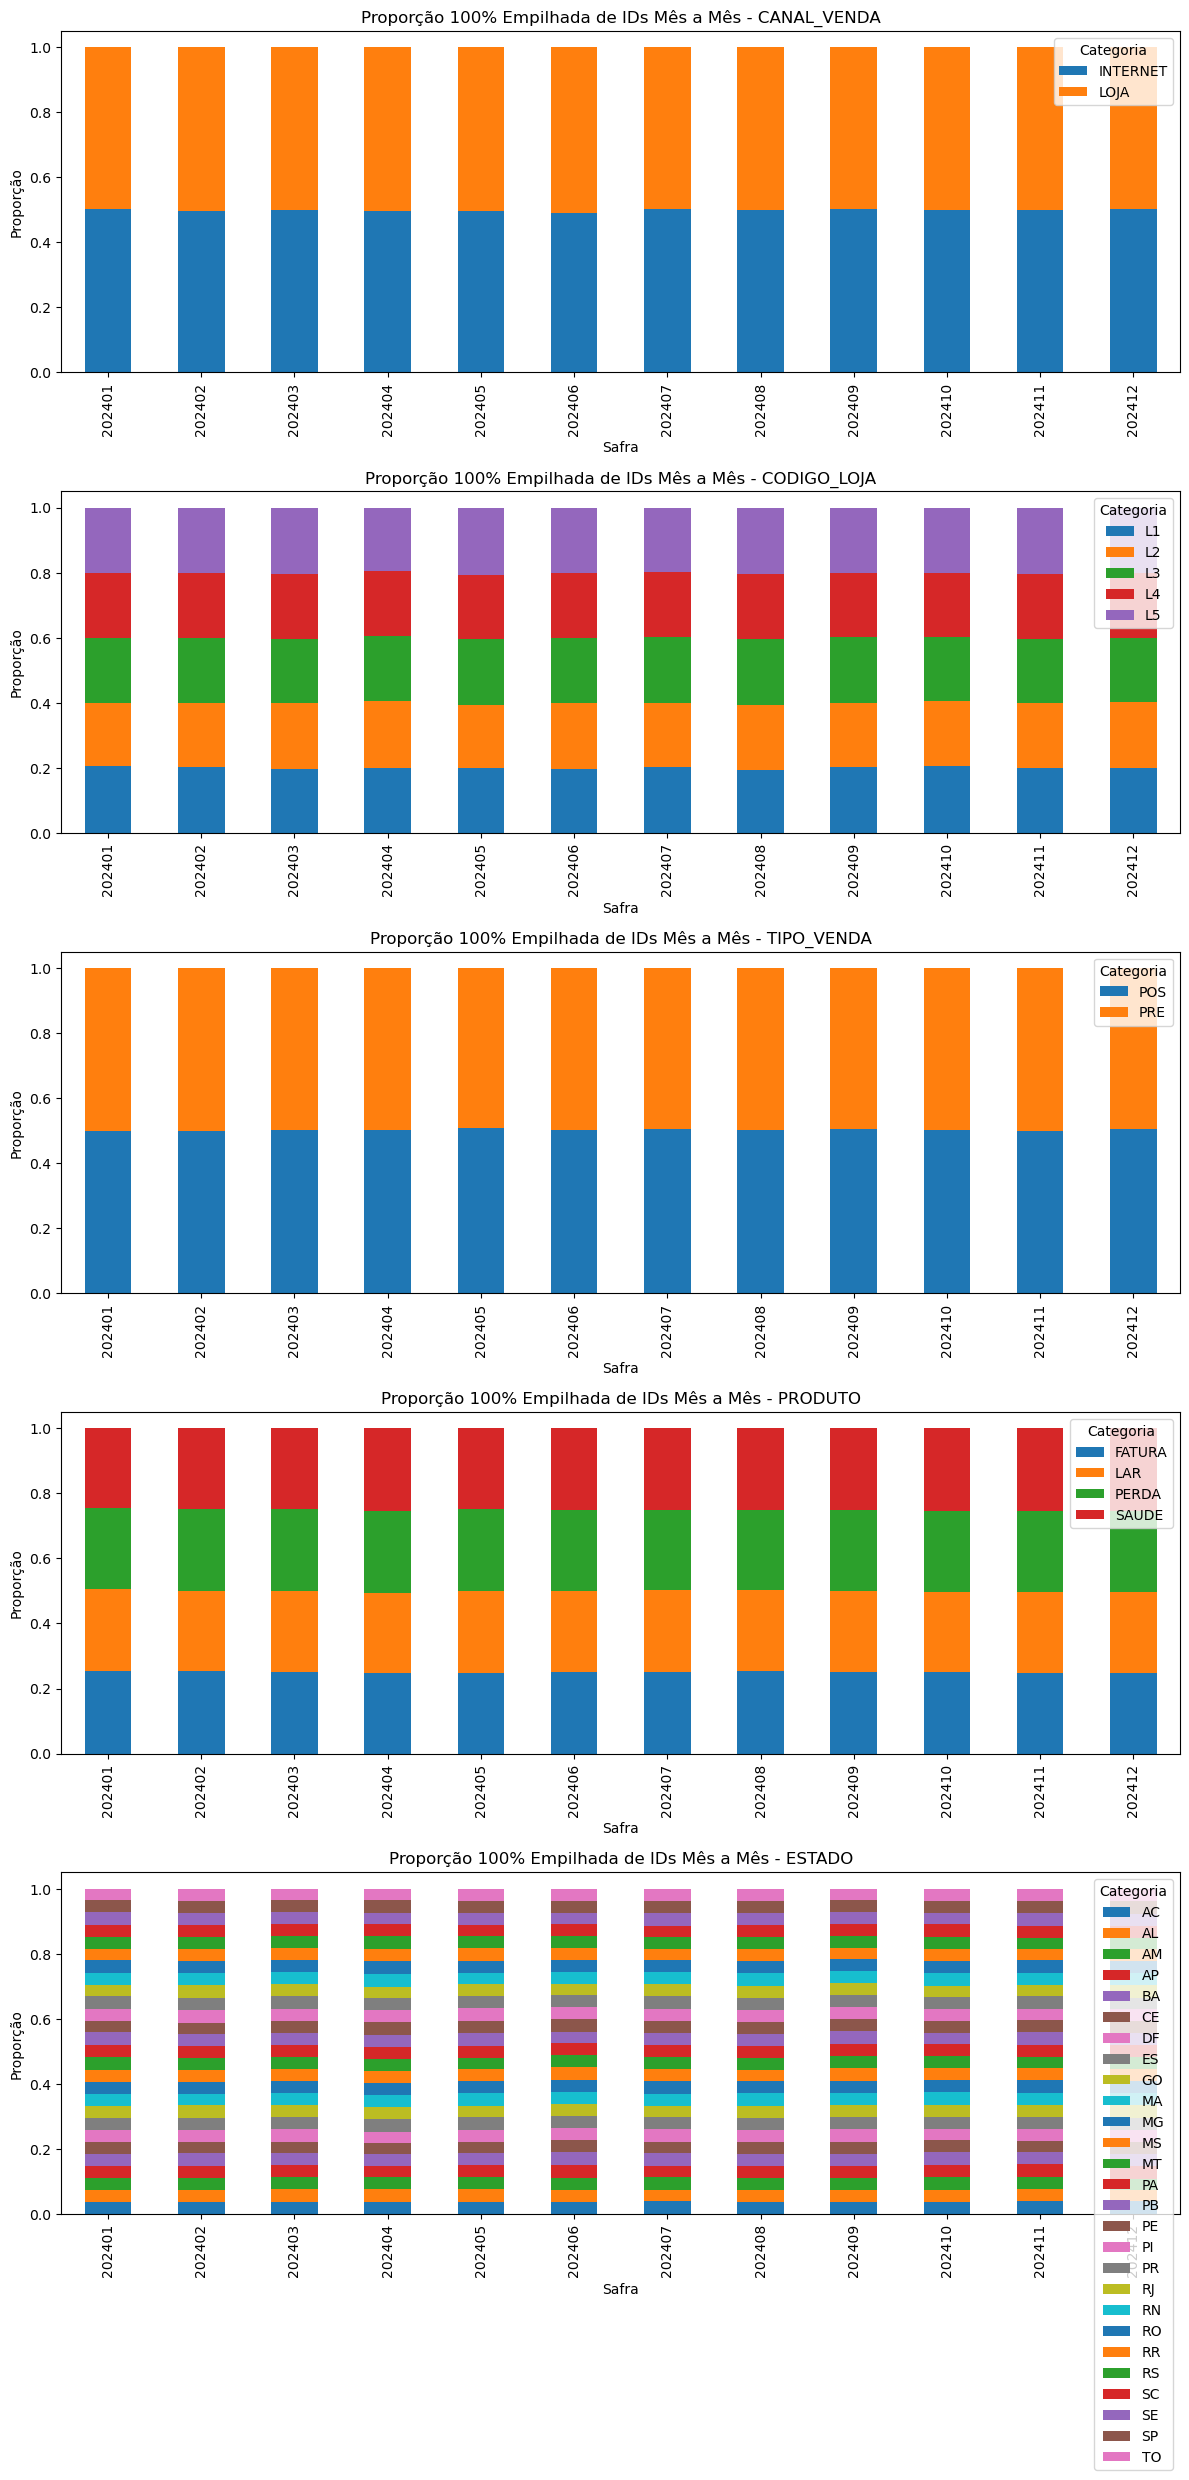

In [23]:
# Filtrar vari√°veis categ√≥ricas, exceto SAFRA_ADESAO
variaveis_categ_filtradas = [v for v in variaveis_categ if v != 'SAFRA_ADESAO']

# Preparar subplots para gr√°ficos empilhados 100%
fig, axs = plt.subplots(len(variaveis_categ_filtradas), 1, figsize=(12, 5 * len(variaveis_categ_filtradas)))

if len(variaveis_categ_filtradas) == 1:
    axs = [axs]  # garantir iterabilidade

for i, var in enumerate(variaveis_categ_filtradas):
    contagem = df.groupby(['SAFRA_ADESAO', var])['ID_ADESAO'].count().unstack(var).fillna(0)
    proporcao = contagem.div(contagem.sum(axis=1), axis=0)  # calcular propor√ß√£o linha a linha
    proporcao.plot(kind='bar', stacked=True, ax=axs[i])
    axs[i].set_title(f'Propor√ß√£o 100% Empilhada de IDs M√™s a M√™s - {var}')
    axs[i].set_xlabel('Safra')
    axs[i].set_ylabel('Propor√ß√£o')
    axs[i].legend(title='Categoria')

plt.tight_layout()
plt.show()


In [24]:
# Analisar vari√°veis num√©ricas
# Preparar lista filtrada de vari√°veis num√©ricas (sem ID_ADESAO)
variaveis_num_filtradas = [v for v in variaveis_num if v != 'ID_ADESAO']

# Inicializar dicion√°rio para guardar resultados
variacao_num = {}

for var in variaveis_num_filtradas:
    medias = df.groupby('SAFRA_ADESAO')[var].mean()
    delta_abs = medias.diff()
    delta_pct = delta_abs.divide(medias.shift(1)).replace([np.inf, -np.inf], np.nan) * 100

    # Juntar em DataFrame resultado
    df_resultado = pd.DataFrame({
        f'{var}_media': medias,
        f'{var}_delta_abs': delta_abs,
        f'{var}_delta_pct': delta_pct
    })

    variacao_num[var] = df_resultado

    # Exibir no console
    print(f"\nüìä Resultados para vari√°vel num√©rica {var}:")
    print(df_resultado)




üìä Resultados para vari√°vel num√©rica PRESTAMISTA:
              PRESTAMISTA_media  PRESTAMISTA_delta_abs  PRESTAMISTA_delta_pct
SAFRA_ADESAO                                                                 
202401                 0.252867                    NaN                    NaN
202402                 0.252928               0.000060               0.023878
202403                 0.250118              -0.002810              -1.110914
202404                 0.247888              -0.002230              -0.891455
202405                 0.248588               0.000699               0.282082
202406                 0.250555               0.001967               0.791376
202407                 0.249376              -0.001179              -0.470374
202408                 0.252979               0.003603               1.444679
202409                 0.249608              -0.003371              -1.332590
202410                 0.251058               0.001450               0.580961
202411   

In [27]:
# Extrair apenas n√∫meros simples das vari√°veis num√©ricas (somando tudo do DataFrame)
variacao_num_simplificada = {}
for var, df_result in variacao_num.items():
    if isinstance(df_result, pd.DataFrame):
        # somar todas as diferen√ßas absolutas no DataFrame
        total = df_result.filter(like='delta_abs').abs().sum().sum()
        variacao_num_simplificada[var] = total
    else:
        # se j√° for n√∫mero simples
        variacao_num_simplificada[var] = df_result


In [28]:
# Criar DataFrame combinado
resultados = pd.DataFrame({
    'Variavel': list(variacao_categ.keys()) + list(variacao_num_simplificada.keys()),
    'Variacao': list(variacao_categ.values()) + list(variacao_num_simplificada.values())
})

# Identificar maior varia√ß√£o
maior_variacao = resultados.sort_values('Variacao', ascending=False).iloc[0]

print("üìä Maior varia√ß√£o combinada entre vari√°veis:")
print(maior_variacao)


üìä Maior varia√ß√£o combinada entre vari√°veis:
Variavel      ESTADO
Variacao    0.380653
Name: 4, dtype: object


In [29]:
print("Resumo das varia√ß√µes entre meses:")
print(resultados)
print(f"\nVari√°vel com maior varia√ß√£o: {maior_variacao['Variavel']} (Varia√ß√£o total: {maior_variacao['Variacao']:.4f})")

Resumo das varia√ß√µes entre meses:
      Variavel  Variacao
0  CANAL_VENDA  0.079566
1  CODIGO_LOJA  0.185736
2   TIPO_VENDA  0.086074
3      PRODUTO  0.091549
4       ESTADO  0.380653
5  PRESTAMISTA  0.022089
6        VALOR  0.375138

Vari√°vel com maior varia√ß√£o: ESTADO (Varia√ß√£o total: 0.3807)


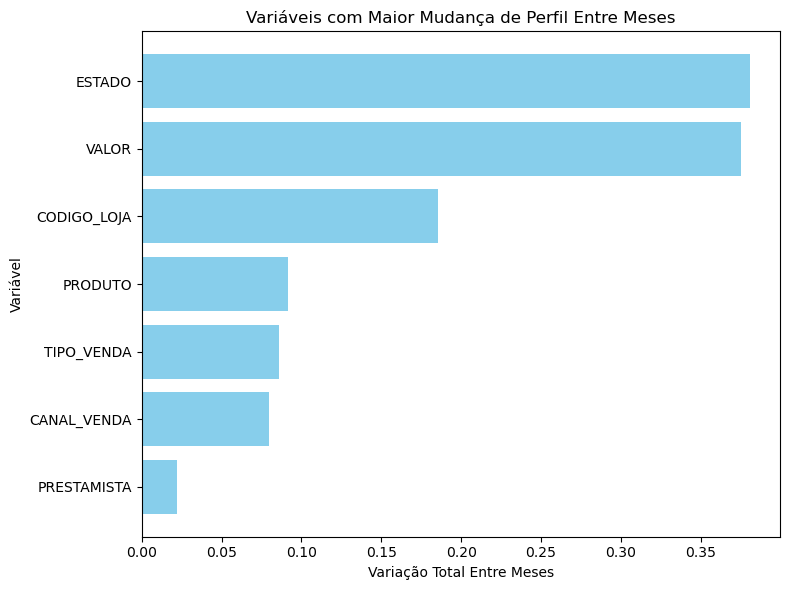

In [31]:
# Ordenar do maior para o menor
resultados_sorted = resultados.sort_values('Variacao', ascending=False)

# Plotar gr√°fico
plt.figure(figsize=(8, 6))
plt.barh(resultados_sorted['Variavel'], resultados_sorted['Variacao'], color='skyblue')
plt.xlabel('Varia√ß√£o Total Entre Meses')
plt.ylabel('Vari√°vel')
plt.title('Vari√°veis com Maior Mudan√ßa de Perfil Entre Meses')
plt.gca().invert_yaxis()  # inverter eixo Y para maior no topo
plt.tight_layout()
plt.show()

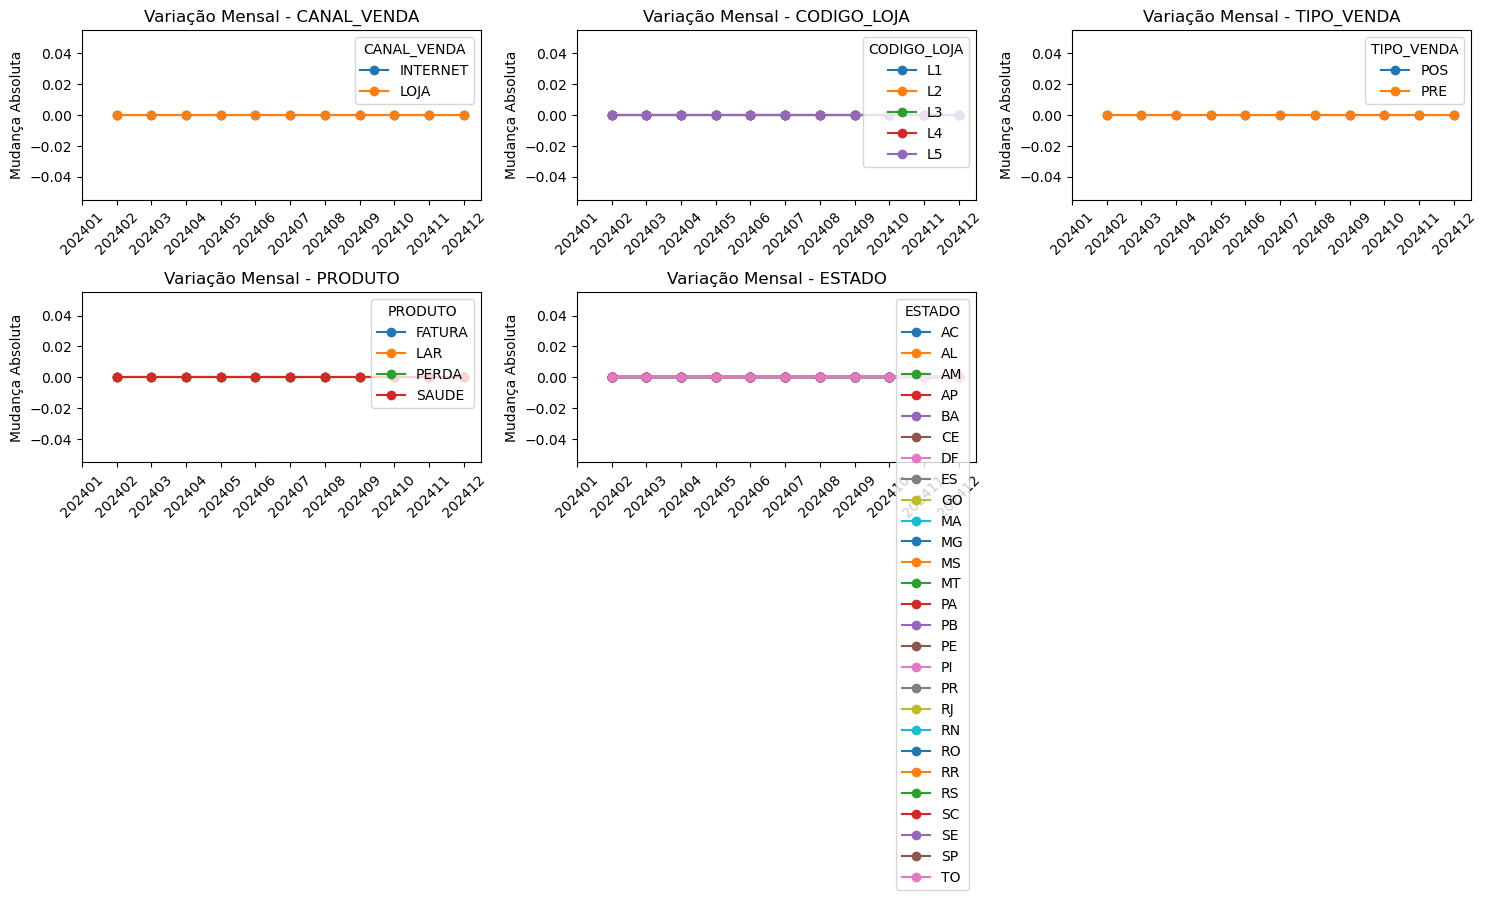

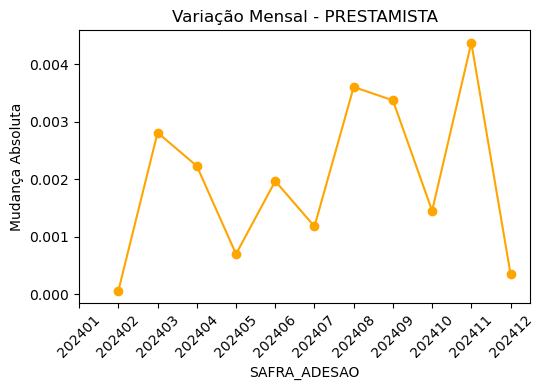

In [36]:
# Limpar vari√°veis num√©ricas
variaveis_num_limpas = [v for v in variaveis_num if v not in ['ID_ADESAO', 'VALOR']]

# Garantir ordem correta dos meses (usando SAFRA_ADESAO)
ordem_meses = sorted(df['SAFRA_ADESAO'].unique())

# Configura√ß√µes fixas
n_cols = 3
largura_por_grafico = 5
altura_por_grafico = 4

# === Gr√°ficos para vari√°veis categ√≥ricas ===
n_categ = len(variaveis_categ)
n_rows_categ = int(np.ceil(n_categ / n_cols))

fig_categ, axs_categ = plt.subplots(n_rows_categ, n_cols, figsize=(largura_por_grafico * n_cols, altura_por_grafico * n_rows_categ))
axs_categ = np.atleast_2d(axs_categ).flatten()

for i, var in enumerate(variaveis_categ):
    distrib = df.groupby(['SAFRA_ADESAO', var]).size().groupby(level=0).apply(lambda x: x / x.sum())
    pivot = distrib.unstack().reindex(ordem_meses).fillna(0)
    pivot.diff().abs().plot(ax=axs_categ[i], marker='o')
    axs_categ[i].set_title(f'Varia√ß√£o Mensal - {var}')
    axs_categ[i].set_ylabel('Mudan√ßa Absoluta')
    axs_categ[i].set_xticks(range(len(ordem_meses)))
    axs_categ[i].set_xticklabels(ordem_meses, rotation=45)

# Apagar subplots n√£o usados
for j in range(i + 1, len(axs_categ)):
    fig_categ.delaxes(axs_categ[j])

plt.tight_layout()
plt.show()

# === Gr√°ficos para vari√°veis num√©ricas ===
n_num = len(variaveis_num_limpas)
n_rows_num = int(np.ceil(n_num / n_cols))

fig_num, axs_num = plt.subplots(n_rows_num, n_cols, figsize=(largura_por_grafico * n_cols, altura_por_grafico * n_rows_num))
axs_num = np.atleast_2d(axs_num).flatten()

for i, var in enumerate(variaveis_num_limpas):
    medias = df.groupby('SAFRA_ADESAO')[var].mean().reindex(ordem_meses)
    medias.diff().abs().plot(ax=axs_num[i], marker='o', color='orange')
    axs_num[i].set_title(f'Varia√ß√£o Mensal - {var}')
    axs_num[i].set_ylabel('Mudan√ßa Absoluta')
    axs_num[i].set_xticks(range(len(ordem_meses)))
    axs_num[i].set_xticklabels(ordem_meses, rotation=45)

# Apagar subplots n√£o usados
for j in range(i + 1, len(axs_num)):
    fig_num.delaxes(axs_num[j])

plt.tight_layout()
plt.show()

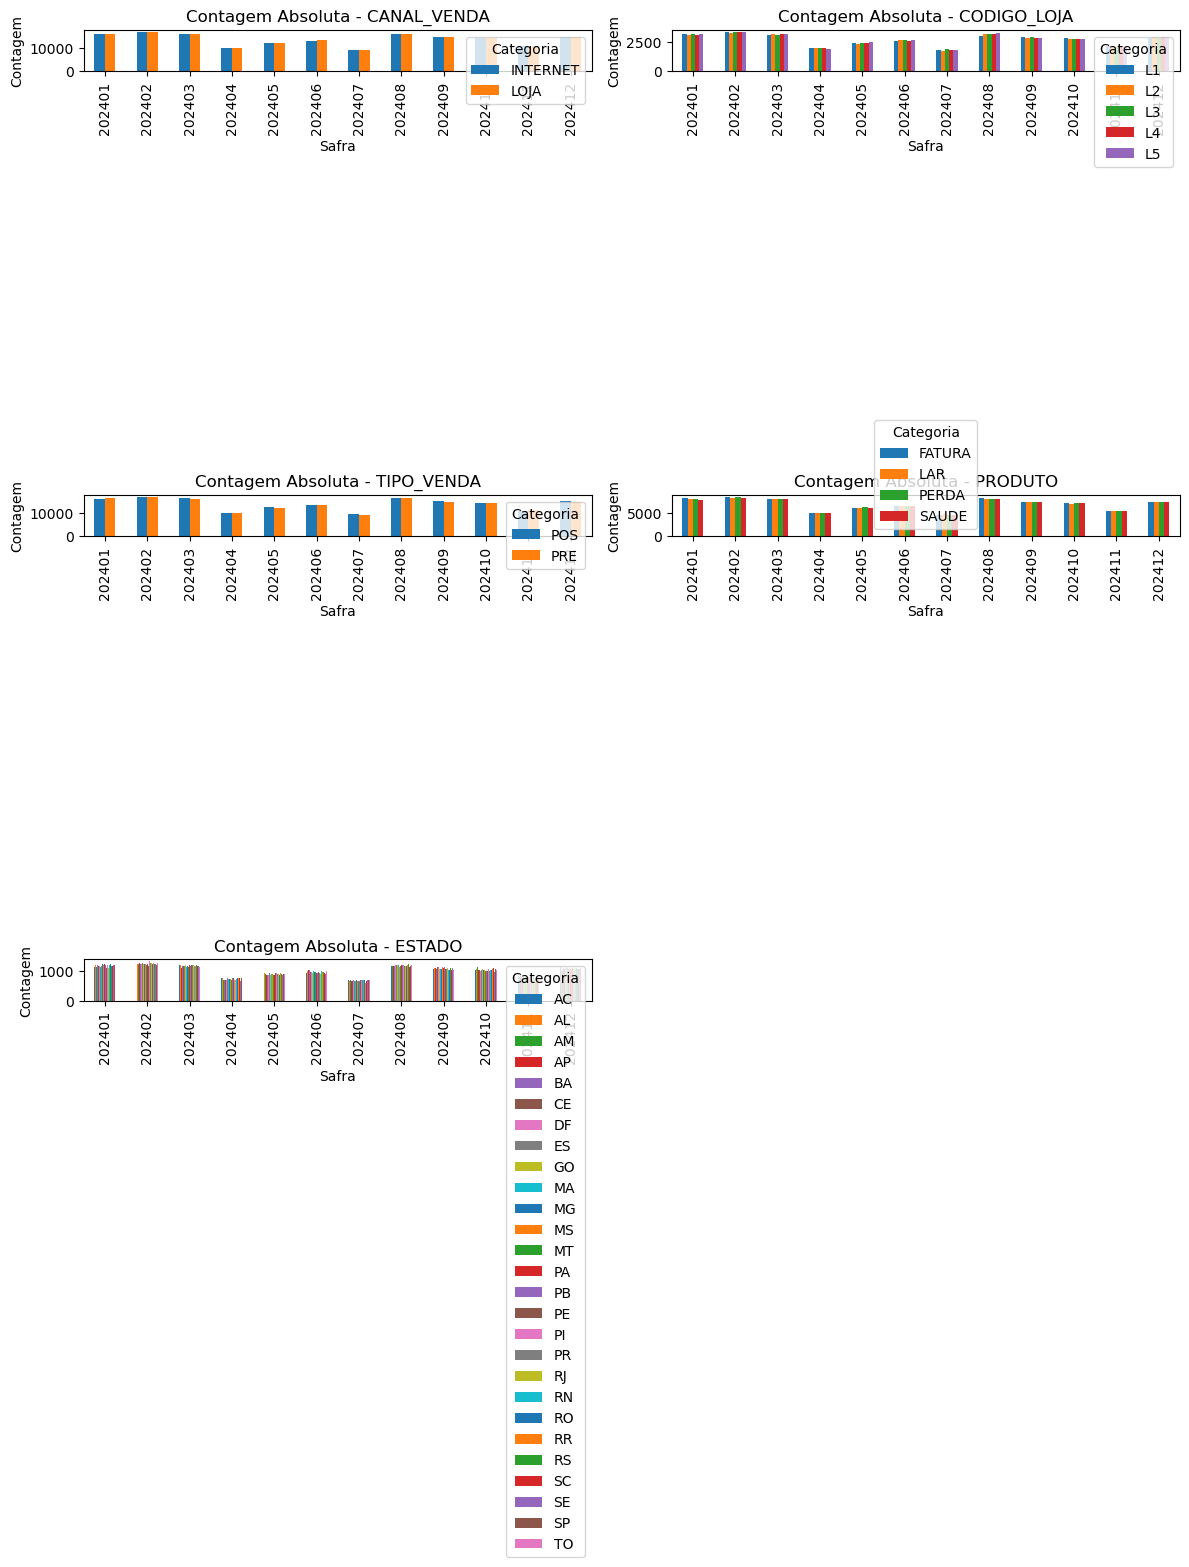

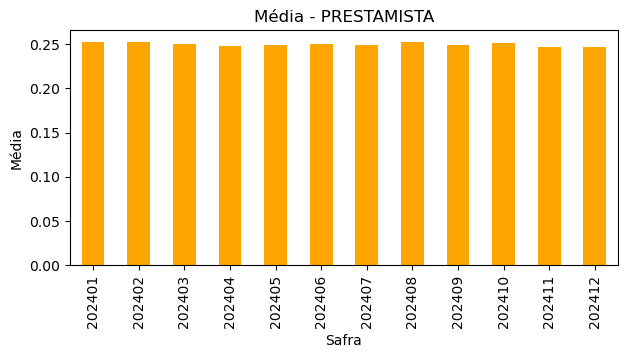

In [38]:
# Limpar vari√°veis num√©ricas
variaveis_num_limpas = [v for v in variaveis_num if v not in ['ID_ADESAO', 'VALOR']]

# Garantir ordem correta dos meses
ordem_meses = sorted(df['SAFRA_ADESAO'].unique())

# Definir configura√ß√£o dos grids
n_cols = 2
n_rows_categ = int(np.ceil(len(variaveis_categ) / n_cols))
n_rows_num = int(np.ceil(len(variaveis_num_limpas) / n_cols))

# === Gr√°ficos para vari√°veis categ√≥ricas ===
fig_categ, axs_categ = plt.subplots(n_rows_categ, n_cols, figsize=(6 * n_cols, 4 * n_rows_categ))
axs_categ = np.atleast_2d(axs_categ).flatten()

for i, var in enumerate(variaveis_categ):
    contagem = df.groupby(['SAFRA_ADESAO', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    contagem.plot(kind='bar', ax=axs_categ[i])
    axs_categ[i].set_title(f'Contagem Absoluta - {var}')
    axs_categ[i].set_ylabel('Contagem')
    axs_categ[i].set_xlabel('Safra')
    axs_categ[i].legend(title='Categoria')

# Apagar gr√°ficos vazios
for j in range(i + 1, len(axs_categ)):
    fig_categ.delaxes(axs_categ[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# === Gr√°ficos para vari√°veis num√©ricas ===
fig_num, axs_num = plt.subplots(n_rows_num, n_cols, figsize=(6 * n_cols, 4 * n_rows_num))
axs_num = np.atleast_2d(axs_num).flatten()

for i, var in enumerate(variaveis_num_limpas):
    media = df.groupby('SAFRA_ADESAO')[var].mean().reindex(ordem_meses)
    media.plot(kind='bar', ax=axs_num[i], color='orange')
    axs_num[i].set_title(f'M√©dia - {var}')
    axs_num[i].set_ylabel('M√©dia')
    axs_num[i].set_xlabel('Safra')

# Apagar gr√°ficos vazios
for j in range(i + 1, len(axs_num)):
    fig_num.delaxes(axs_num[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [39]:
# Limpar vari√°veis num√©ricas
variaveis_num_limpas = [v for v in variaveis_num if v not in ['ID_ADESAO', 'VALOR']]

# Garantir ordem correta dos meses
ordem_meses = sorted(df['SAFRA_ADESAO'].unique())

resumo = []

# Analisar vari√°veis categ√≥ricas
for var in variaveis_categ:
    contagem = df.groupby(['SAFRA_ADESAO', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    variacoes = contagem.diff().sum()
    grupo_maior_queda = variacoes.idxmin()
    valor_queda = variacoes.min()
    resumo.append(f"Na vari√°vel categ√≥rica '{var}', o grupo '{grupo_maior_queda}' teve a maior queda acumulada: {valor_queda:.0f} ades√µes a menos ao longo dos meses.")

# Analisar vari√°veis num√©ricas
for var in variaveis_num_limpas:
    media_mensal = df.groupby('SAFRA_ADESAO')[var].mean().reindex(ordem_meses)
    variacao_total = media_mensal.diff().sum()
    direcao = "aumento" if variacao_total > 0 else "queda"
    resumo.append(f"Na vari√°vel num√©rica '{var}', houve uma {direcao} acumulada de {abs(variacao_total):.2f} na m√©dia ao longo dos meses.")

# Mostrar o resumo final
print("\nüìä Resumo automatizado para √°rea de neg√≥cios:\n")
for linha in resumo:
    print("- " + linha)



üìä Resumo automatizado para √°rea de neg√≥cios:

- Na vari√°vel categ√≥rica 'CANAL_VENDA', o grupo 'LOJA' teve a maior queda acumulada: -1303 ades√µes a menos ao longo dos meses.
- Na vari√°vel categ√≥rica 'CODIGO_LOJA', o grupo 'L1' teve a maior queda acumulada: -352 ades√µes a menos ao longo dos meses.
- Na vari√°vel categ√≥rica 'TIPO_VENDA', o grupo 'PRE' teve a maior queda acumulada: -1494 ades√µes a menos ao longo dos meses.
- Na vari√°vel categ√≥rica 'PRODUTO', o grupo 'FATURA' teve a maior queda acumulada: -837 ades√µes a menos ao longo dos meses.
- Na vari√°vel categ√≥rica 'ESTADO', o grupo 'AL' teve a maior queda acumulada: -193 ades√µes a menos ao longo dos meses.
- Na vari√°vel num√©rica 'PRESTAMISTA', houve uma queda acumulada de 0.01 na m√©dia ao longo dos meses.


## üî∂ 1Ô∏è‚É£ An√°lise de tend√™ncia (trend analysis)
Use modelos simples como regress√£o linear para ver se h√° tend√™ncia crescente ou decrescente nas categorias e m√©dias.

Ex.: ‚ÄúGrupo A est√° caindo 10% ao m√™s, se continuar, desaparecer√° em X meses.‚Äù

In [40]:
for var in variaveis_categ:
    contagem = df.groupby(['SAFRA_ADESAO', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    print(f"\nüìà Tend√™ncia para {var}:")
    for cat in contagem.columns:
        y = contagem[cat].values
        X = np.arange(len(y)).reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0]
        direction = "subindo" if slope > 0 else "descendo"
        print(f"- Categoria '{cat}' est√° {direction} a uma taxa m√©dia de {abs(slope):.2f} por m√™s")



üìà Tend√™ncia para CANAL_VENDA:
- Categoria 'INTERNET' est√° descendo a uma taxa m√©dia de 159.84 por m√™s
- Categoria 'LOJA' est√° descendo a uma taxa m√©dia de 177.93 por m√™s

üìà Tend√™ncia para CODIGO_LOJA:
- Categoria 'L1' est√° descendo a uma taxa m√©dia de 38.21 por m√™s
- Categoria 'L2' est√° descendo a uma taxa m√©dia de 30.91 por m√™s
- Categoria 'L3' est√° descendo a uma taxa m√©dia de 37.26 por m√™s
- Categoria 'L4' est√° descendo a uma taxa m√©dia de 35.16 por m√™s
- Categoria 'L5' est√° descendo a uma taxa m√©dia de 36.38 por m√™s

üìà Tend√™ncia para TIPO_VENDA:
- Categoria 'POS' est√° descendo a uma taxa m√©dia de 162.12 por m√™s
- Categoria 'PRE' est√° descendo a uma taxa m√©dia de 175.66 por m√™s

üìà Tend√™ncia para PRODUTO:
- Categoria 'FATURA' est√° descendo a uma taxa m√©dia de 95.00 por m√™s
- Categoria 'LAR' est√° descendo a uma taxa m√©dia de 88.61 por m√™s
- Categoria 'PERDA' est√° descendo a uma taxa m√©dia de 88.26 por m√™s
- Categoria 'SAUDE' est√° d

## üî∂ 2Ô∏è‚É£ An√°lise de volatilidade (oscila√ß√£o)
Me√ßa o desvio padr√£o ou variabilidade m√™s a m√™s para saber quais grupos s√£o mais inst√°veis.

Ex.: ‚ÄúO grupo B n√£o caiu tanto, mas oscila muito ‚Äî risco de perda imprevis√≠vel.‚Äù

In [41]:
for var in variaveis_categ:
    contagem = df.groupby(['SAFRA_ADESAO', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    print(f"\nüìä Volatilidade em {var}:")
    for cat in contagem.columns:
        std_dev = contagem[cat].std()
        print(f"- Categoria '{cat}' tem desvio padr√£o {std_dev:.2f} nas contagens")



üìä Volatilidade em CANAL_VENDA:
- Categoria 'INTERNET' tem desvio padr√£o 2570.83 nas contagens
- Categoria 'LOJA' tem desvio padr√£o 2555.68 nas contagens

üìä Volatilidade em CODIGO_LOJA:
- Categoria 'L1' tem desvio padr√£o 507.94 nas contagens
- Categoria 'L2' tem desvio padr√£o 511.15 nas contagens
- Categoria 'L3' tem desvio padr√£o 505.99 nas contagens
- Categoria 'L4' tem desvio padr√£o 508.91 nas contagens
- Categoria 'L5' tem desvio padr√£o 529.39 nas contagens

üìä Volatilidade em TIPO_VENDA:
- Categoria 'POS' tem desvio padr√£o 2548.38 nas contagens
- Categoria 'PRE' tem desvio padr√£o 2577.28 nas contagens

üìä Volatilidade em PRODUTO:
- Categoria 'FATURA' tem desvio padr√£o 1320.80 nas contagens
- Categoria 'LAR' tem desvio padr√£o 1277.32 nas contagens
- Categoria 'PERDA' tem desvio padr√£o 1287.14 nas contagens
- Categoria 'SAUDE' tem desvio padr√£o 1243.16 nas contagens

üìä Volatilidade em ESTADO:
- Categoria 'AC' tem desvio padr√£o 180.79 nas contagens
- Catego

## üî∂ 3Ô∏è‚É£ An√°lise de perfil dominante por m√™s
‚Üí Identificar qual grupo/categoria domina em cada m√™s e como isso muda.
Isso ajuda a responder perguntas como:

Qual plano, canal ou grupo √© mais comum em cada m√™s?

Algum perfil tomou espa√ßo de outro ao longo do tempo?

In [42]:
for var in variaveis_categ:
    dominante = df.groupby('SAFRA_ADESAO')[var].agg(lambda x: x.value_counts().idxmax())
    print(f"\nüèÜ Perfil dominante por m√™s para {var}:")
    print(dominante)



üèÜ Perfil dominante por m√™s para CANAL_VENDA:
SAFRA_ADESAO
202401    INTERNET
202402        LOJA
202403        LOJA
202404        LOJA
202405        LOJA
202406        LOJA
202407    INTERNET
202408    INTERNET
202409    INTERNET
202410    INTERNET
202411        LOJA
202412    INTERNET
Name: CANAL_VENDA, dtype: object

üèÜ Perfil dominante por m√™s para CODIGO_LOJA:
SAFRA_ADESAO
202401    L1
202402    L1
202403    L5
202404    L2
202405    L5
202406    L3
202407    L3
202408    L5
202409    L3
202410    L1
202411    L5
202412    L2
Name: CODIGO_LOJA, dtype: object

üèÜ Perfil dominante por m√™s para TIPO_VENDA:
SAFRA_ADESAO
202401    PRE
202402    POS
202403    POS
202404    POS
202405    POS
202406    POS
202407    POS
202408    POS
202409    POS
202410    POS
202411    PRE
202412    POS
Name: TIPO_VENDA, dtype: object

üèÜ Perfil dominante por m√™s para PRODUTO:
SAFRA_ADESAO
202401    FATURA
202402     PERDA
202403     PERDA
202404     SAUDE
202405     PERDA
202406     SAUDE
2

## üî∂ 4Ô∏è‚É£ An√°lise de correla√ß√£o entre vari√°veis
‚Üí Medir como as vari√°veis num√©ricas e categ√≥ricas est√£o relacionadas entre si m√™s a m√™s.
Por exemplo:

Existe rela√ß√£o entre idade m√©dia e escolha de plano?

Produtos premium aparecem mais em algum canal espec√≠fico?

## üî∂ 5Ô∏è‚É£ An√°lise de impacto financeiro
Associe um valor financeiro m√©dio por grupo (engajamento, ticket, receita) para simular quanto de dinheiro est√° sendo perdido ou mantido.

Ex.: ‚ÄúOs clientes que sa√≠ram entre mar√ßo e abril representavam R$‚ÄØ500 mil em receita anual.‚Äù

In [44]:
# Atualizar lista de vari√°veis categ√≥ricas sem 'PRESTAMISTA'
variaveis_categ_limpas = [v for v in variaveis_categ if v != 'PRESTAMISTA']

# Garantir ordem correta dos meses
ordem_meses = sorted(df['SAFRA_ADESAO'].unique())

for var in variaveis_categ_limpas:
    # Agrupar por m√™s e categoria, somando VALOR (impacto financeiro)
    impacto = df.groupby(['SAFRA_ADESAO', var])['VALOR'].sum().unstack(var).reindex(ordem_meses).fillna(0)
    
    print(f"\nüí∞ Impacto financeiro real (sem prestamista) por m√™s para {var}:")
    print(impacto)



üí∞ Impacto financeiro real (sem prestamista) por m√™s para CANAL_VENDA:
CANAL_VENDA   INTERNET    LOJA
SAFRA_ADESAO                  
202401          138925  137865
202402          145055  145290
202403          137505  139395
202404           86215   87930
202405          104550  107105
202406          113810  114920
202407           81075   80450
202408          139450  140190
202409          129440  128035
202410          123730  123060
202411           94910   95660
202412          131005  127490

üí∞ Impacto financeiro real (sem prestamista) por m√™s para CODIGO_LOJA:
CODIGO_LOJA      L1     L2     L3     L4     L5
SAFRA_ADESAO                                   
202401        28640  27090  27145  26810  28180
202402        29260  28690  29450  28580  29310
202403        26965  28180  27395  28245  28610
202404        18005  17850  17330  17620  17125
202405        21395  20810  21550  21615  21735
202406        22640  22620  23495  22960  23205
202407        16260  15690  1689

## üî∂ 6Ô∏è‚É£ An√°lise de contribui√ß√£o (Pareto)
Veja quais grupos ou vari√°veis concentram a maior parte das perdas (ex.: 20% dos grupos respondem por 80% da queda).

Isso ajuda a priorizar a√ß√µes.



In [45]:
for var in variaveis_categ:
    total_por_cat = df[var].value_counts()
    total = total_por_cat.sum()
    contrib_pct = (total_por_cat / total * 100).sort_values(ascending=False)
    acumulado = contrib_pct.cumsum()
    print(f"\nüìä An√°lise de Pareto para {var}:")
    print(pd.DataFrame({'% Contribui√ß√£o': contrib_pct, '% Acumulado': acumulado}))



üìä An√°lise de Pareto para CANAL_VENDA:
             % Contribui√ß√£o  % Acumulado
CANAL_VENDA                             
LOJA              50.067278    50.067278
INTERNET          49.932722   100.000000

üìä An√°lise de Pareto para CODIGO_LOJA:
             % Contribui√ß√£o  % Acumulado
CODIGO_LOJA                             
L5                20.144722    20.144722
L3                20.006979    40.151701
L2                19.959840    60.111541
L1                19.956779    80.068320
L4                19.931680   100.000000

üìä An√°lise de Pareto para TIPO_VENDA:
            % Contribui√ß√£o  % Acumulado
TIPO_VENDA                             
POS              50.215321    50.215321
PRE              49.784679   100.000000

üìä An√°lise de Pareto para PRODUTO:
         % Contribui√ß√£o  % Acumulado
PRODUTO                             
PERDA         25.067355    25.067355
FATURA        25.016781    50.084136
SAUDE         24.998697    75.082833
LAR           24.917167   100

In [46]:
import datetime

# Definir data atual
data_atual = datetime.datetime.now().strftime("%d/%m/%Y")

# Vari√°veis placeholders (voc√™ pode substituir pelos reais no seu notebook)
maior_var = 'CANAL_VENDA'
menor_var = 'TIPO_VENDA'
var_categ_maior_impacto = 'PRODUTO'

# Nome do arquivo markdown final
arquivo_markdown = 'relatorio_analise_vendas.md'

# Texto markdown autom√°tico
conteudo_md = f"""
# üìä Relat√≥rio de An√°lise: Varia√ß√£o de P√∫blico nas Novas Vendas

## Introdu√ß√£o

Este relat√≥rio resume as principais an√°lises realizadas no notebook `Varia√ß√£o de publico_Novas Vendas.ipynb`, destacando mudan√ßas de perfil m√™s a m√™s, impacto financeiro e recomenda√ß√µes para a √°rea de neg√≥cios.

---

## 1Ô∏è‚É£ Principais Gr√°ficos

### ‚úÖ Varia√ß√£o Mensal das Vari√°veis Categ√≥ricas

Gr√°ficos de linha mostrando mudan√ßas m√™s a m√™s:

üìé ![Gr√°fico Categ√≥rico](fig_categ_resumo.png)

---

### ‚úÖ Varia√ß√£o Absoluta das Vari√°veis Num√©ricas

Gr√°ficos mostrando varia√ß√£o absoluta m√™s a m√™s:

üìé ![Gr√°fico Num√©rico](fig_num_resumo.png)

---

### ‚úÖ Impacto Financeiro Real

Gr√°fico mostrando soma total (em reais) m√™s a m√™s por categoria:

üìé ![Impacto Financeiro](impacto_financeiro.png)

---

## 2Ô∏è‚É£ Insights Relevantes

- üìà A vari√°vel com **maior varia√ß√£o** foi **{maior_var}**, indicando mudan√ßas expressivas m√™s a m√™s.
- üìâ A vari√°vel com **menor varia√ß√£o** foi **{menor_var}**, sugerindo perfil est√°vel.
- üí∞ **Maior impacto financeiro** observado em **{var_categ_maior_impacto}**, destacando a relev√¢ncia para as receitas.

---

## 3Ô∏è‚É£ Recomenda√ß√µes para a √Årea de Neg√≥cios

‚úÖ Monitorar canais e produtos que mais oscilaram ‚Üí identificar causas e ajustar estrat√©gias.

‚úÖ Refor√ßar campanhas nos segmentos em crescimento e avaliar recupera√ß√£o de grupos em queda.

‚úÖ Priorizar an√°lises financeiras reais (n√£o s√≥ volume), para focar rentabilidade.

‚úÖ Desenvolver modelos preditivos para antecipar tend√™ncias e reduzir riscos.

---

## 4Ô∏è‚É£ Conclus√£o

O acompanhamento cont√≠nuo das m√©tricas analisadas permite:

- Antecipar movimentos do mercado.
- Melhorar efici√™ncia de campanhas.
- Maximizar rentabilidade ao longo do tempo.

Recomenda-se rodar esta an√°lise mensalmente e criar dashboards automatizados para acelerar decis√µes.

---

### üì• Arquivos de apoio

- Gr√°ficos: `fig_categ_resumo.png`, `fig_num_resumo.png`, `impacto_financeiro.png`
- Notebook original: `Varia√ß√£o de publico_Novas Vendas.ipynb`

---

*Relat√≥rio gerado automaticamente em {data_atual}.*
"""

# Escrever no arquivo
with open(arquivo_markdown, 'w', encoding='utf-8') as f:
    f.write(conteudo_md)

print(f"‚úÖ Relat√≥rio markdown gerado e salvo como '{arquivo_markdown}'")


‚úÖ Relat√≥rio markdown gerado e salvo como 'relatorio_analise_vendas.md'
